### California housing dataset

In [1]:
# Import the required function
from sklearn.datasets import fetch_california_housing

# Fetch the dataset
california_data = fetch_california_housing(as_frame=True)

# Access the data and target as a pandas DataFrame
california_df = california_data.frame

# Display the first few rows of the dataset
california_df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [2]:
print(california_data.data.shape, california_data.target.shape)
print(california_data.feature_names)

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [3]:
import matplotlib.pyplot as plt

In [4]:
data = california_data.data
target = california_data.target

# Data visualizing

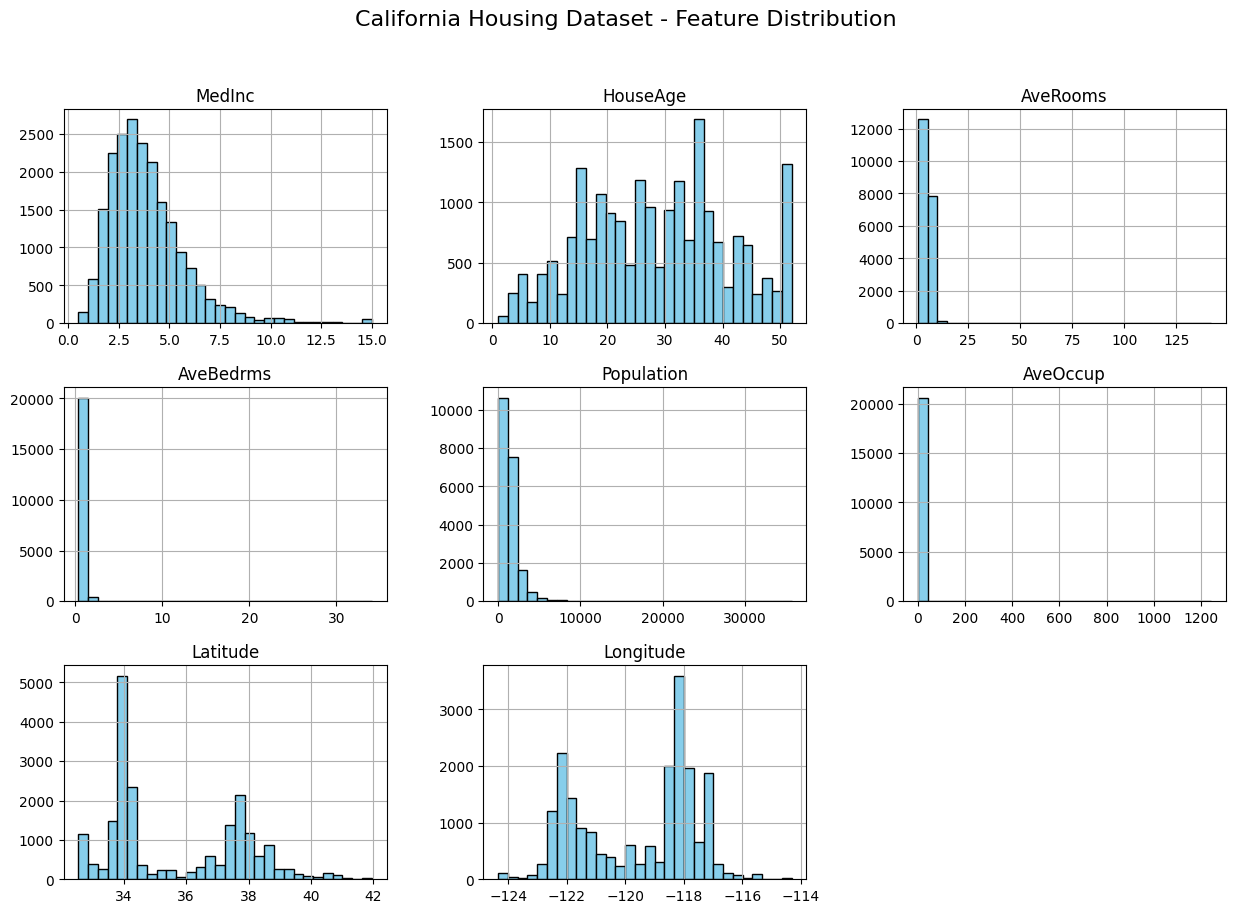

In [5]:
data.hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("California Housing Dataset - Feature Distribution", fontsize=16)
plt.show()

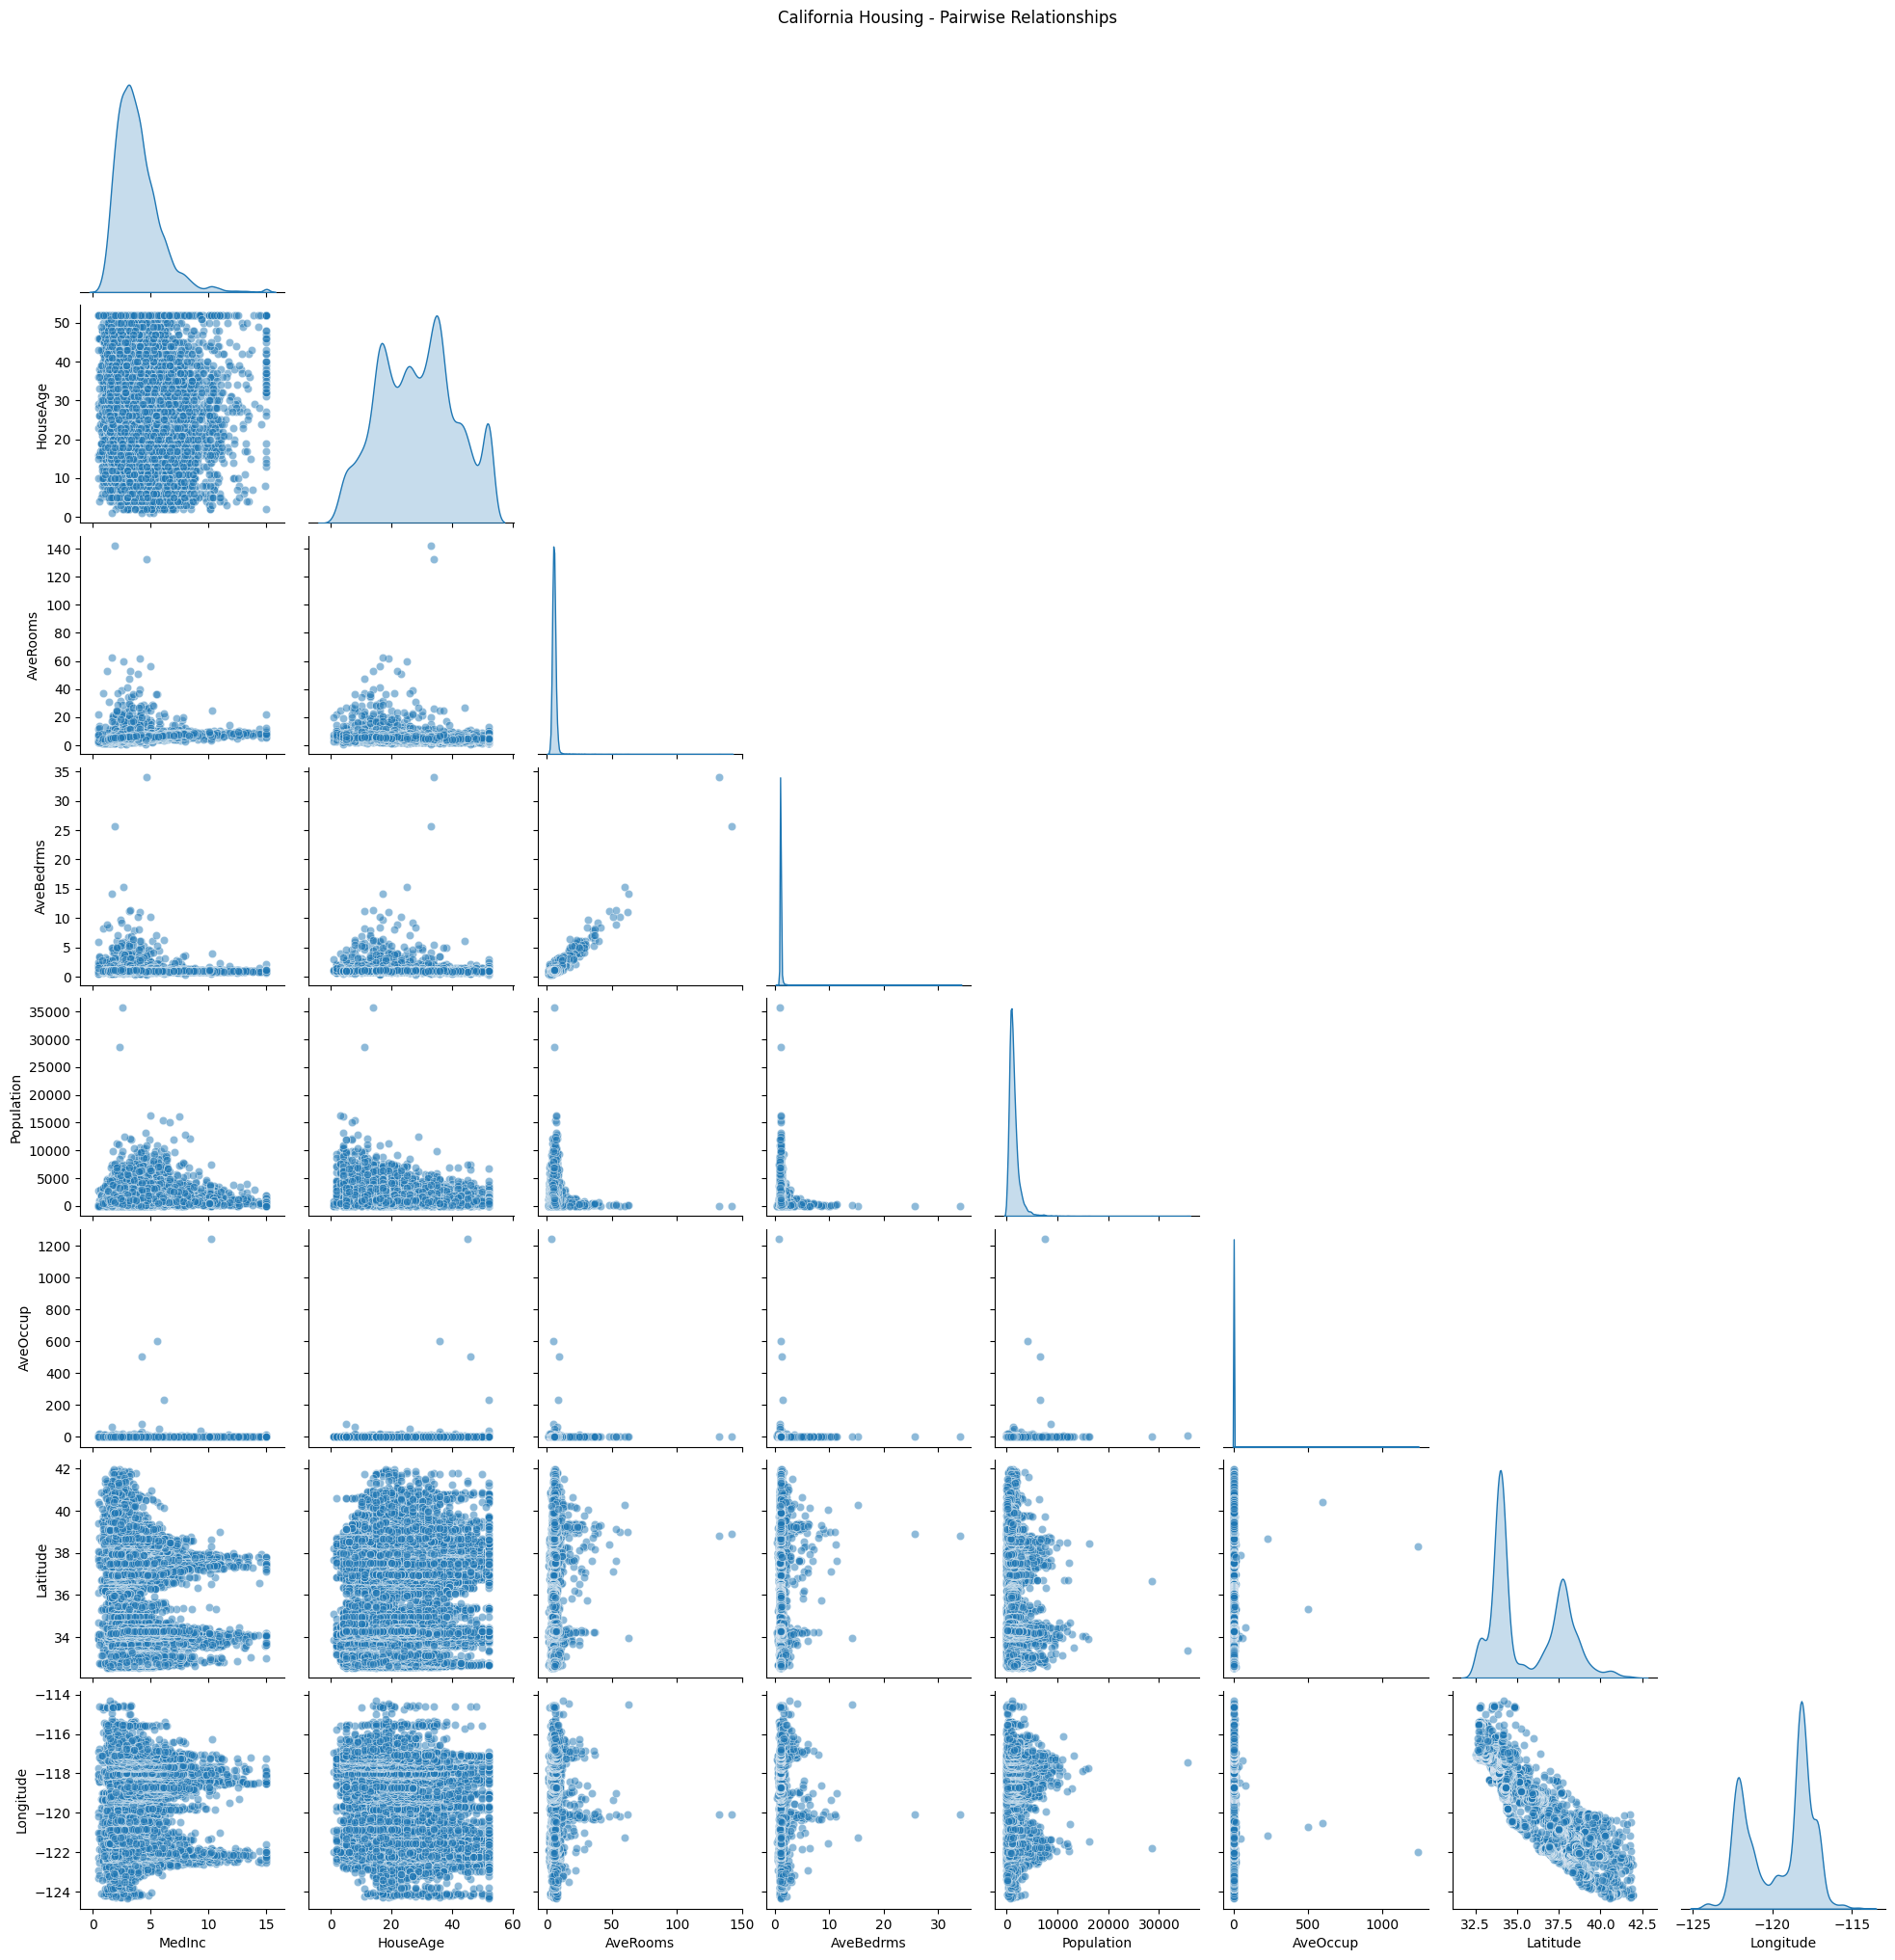

In [6]:
import seaborn as sns

sns.pairplot(data, corner=True, diag_kind="kde", plot_kws={"alpha": 0.5})
plt.suptitle("California Housing - Pairwise Relationships", y=1.02)
plt.show()

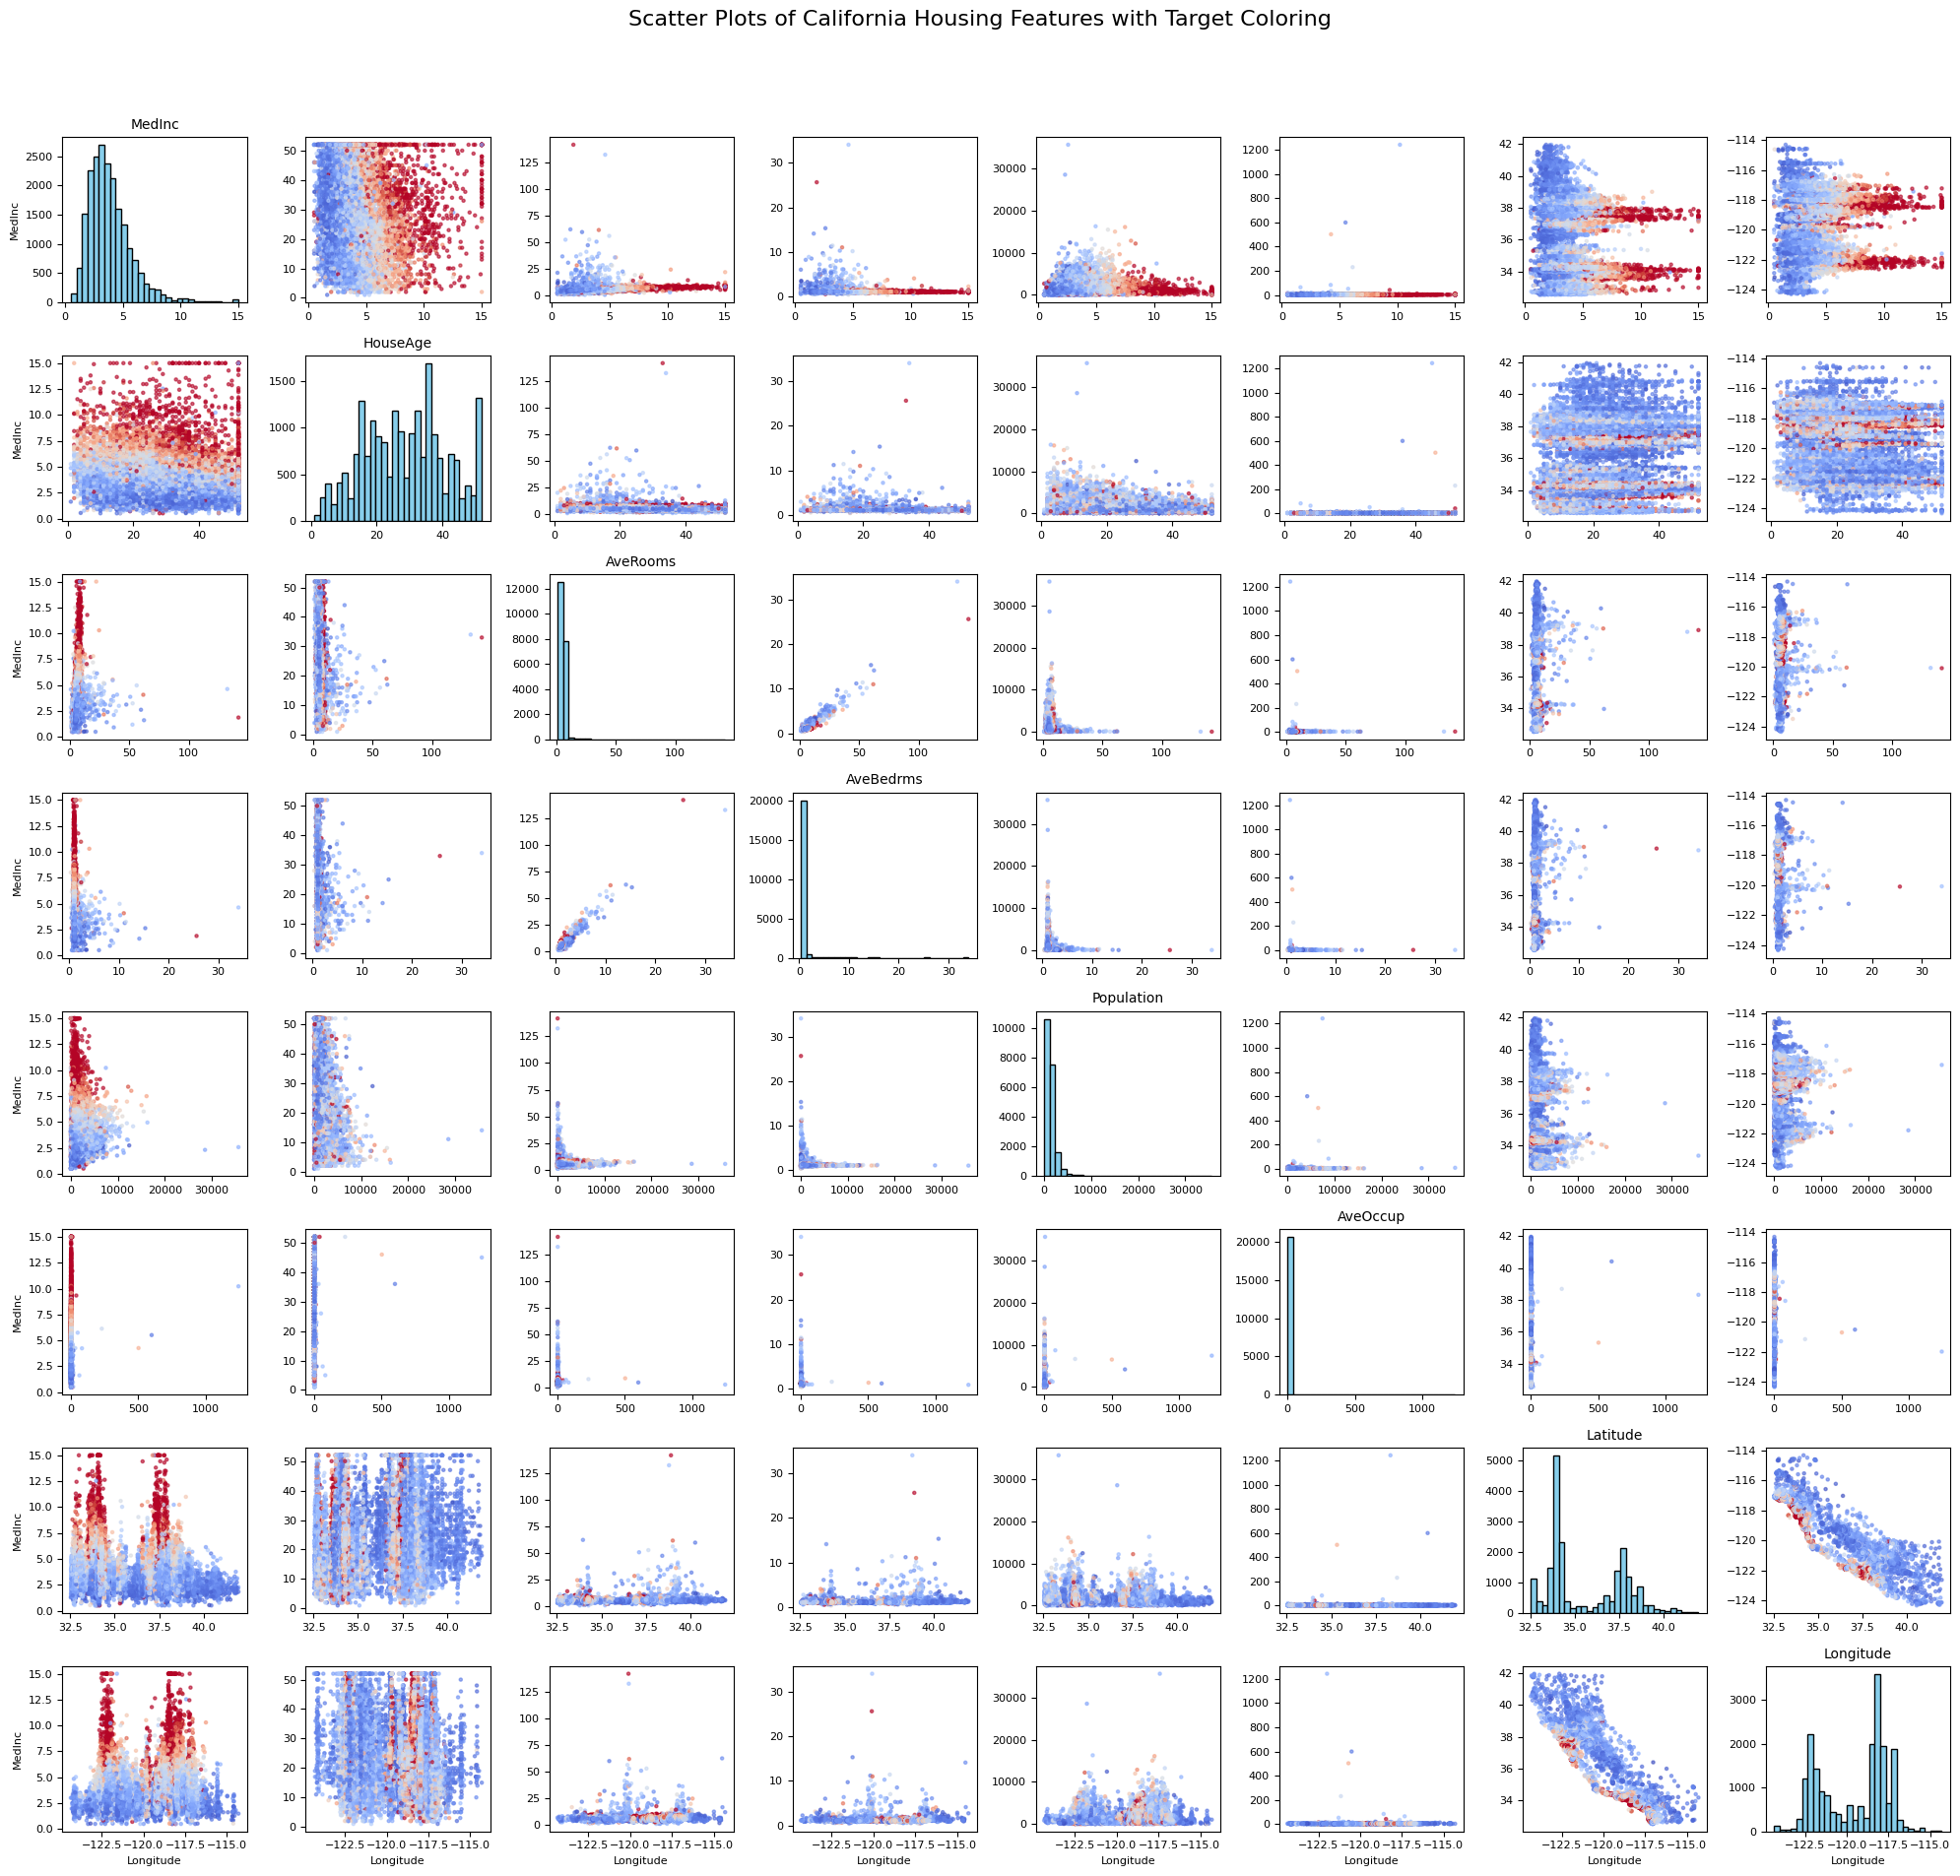

In [8]:
# Get the list of features
features = california_data.feature_names
n_features = len(features)

# Create subplots grid
fig, axes = plt.subplots(n_features, n_features, figsize=(20, 20), sharex=False, sharey=False)

# Iterate through feature pairs
for i, feature_x in enumerate(features):
    for j, feature_y in enumerate(features):
        ax = axes[i, j]

        # If diagonal, show histogram
        if i == j:
            ax.hist(data[feature_x], bins=30, color='skyblue', edgecolor='black')
            ax.set_title(feature_x, fontsize=10)
            ax.tick_params(labelsize=8)
        else:
            # Scatter plot for feature pairs
            scatter = ax.scatter(data[feature_x], data[feature_y], c=target, cmap='coolwarm', s=5, alpha=0.6)
            ax.tick_params(labelsize=8)

        # Set labels for edge subplots
        if i == n_features - 1:
            ax.set_xlabel(feature_x, fontsize=8)
        if j == 0:
            ax.set_ylabel(feature_y, fontsize=8)

# Add a colorbar
# cbar = fig.colorbar(scatter, ax=axes, orientation='horizontal', fraction=0.03, pad=0.04)
# cbar.set_label('Median House Value', fontsize=12)

plt.suptitle('Scatter Plots of California Housing Features with Target Coloring', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

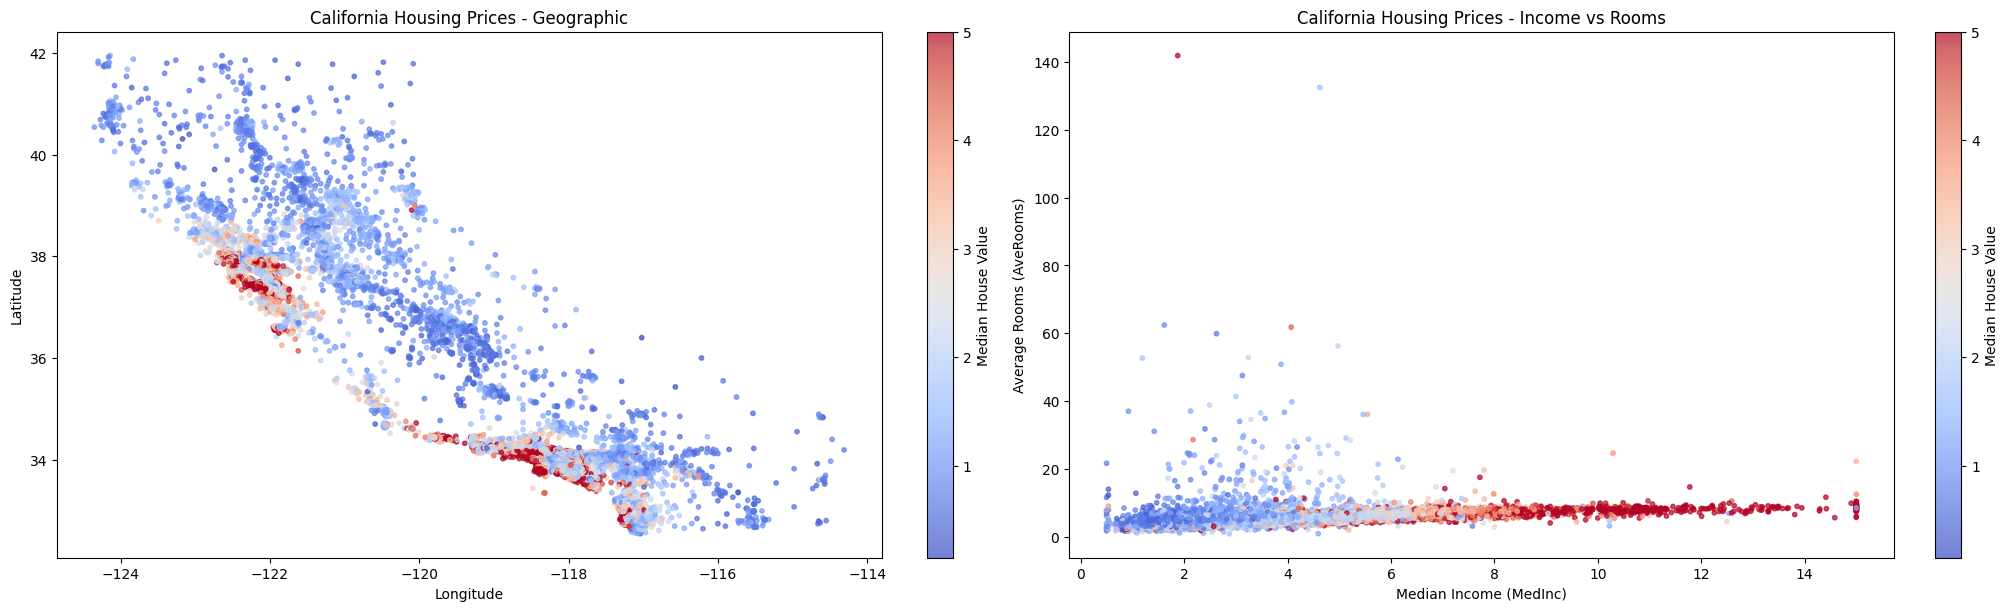

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6), constrained_layout=True)

# First subplot: Geospatial visualization
scatter1 = axes[0].scatter(data['Longitude'], data['Latitude'], c=target, cmap='coolwarm', s=10, alpha=0.7)
fig.colorbar(scatter1, ax=axes[0], label='Median House Value')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')
axes[0].set_title('California Housing Prices - Geographic')

# Second subplot: Median Income vs Average Rooms
scatter2 = axes[1].scatter(data['MedInc'], data['AveRooms'], c=target, cmap='coolwarm', s=10, alpha=0.7)
fig.colorbar(scatter2, ax=axes[1], label='Median House Value')
axes[1].set_xlabel('Median Income (MedInc)')
axes[1].set_ylabel('Average Rooms (AveRooms)')
axes[1].set_title('California Housing Prices - Income vs Rooms')

plt.show()

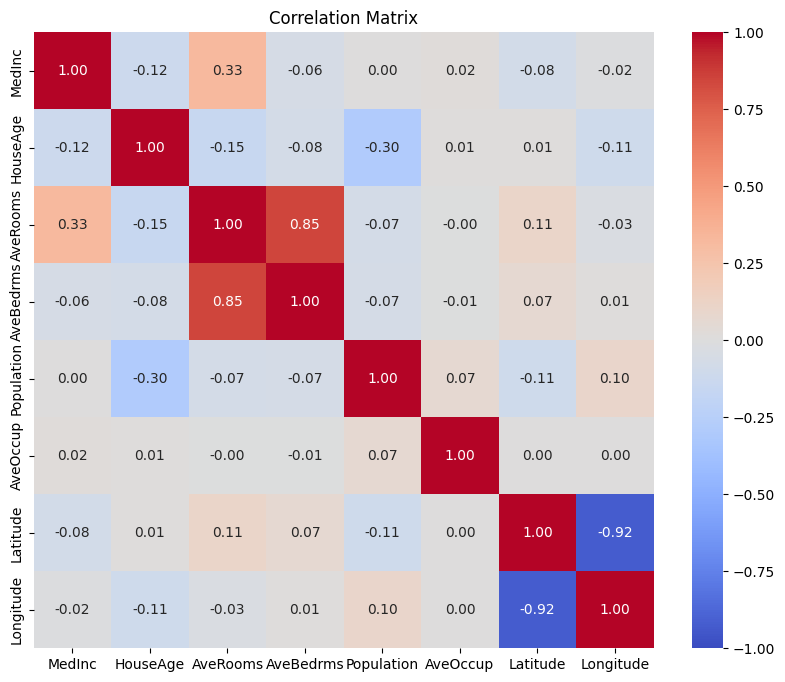

In [10]:
import numpy as np

corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

# Data cleaning

In [11]:
#check for missing values
california_data.data.isnull().values.any()

np.False_

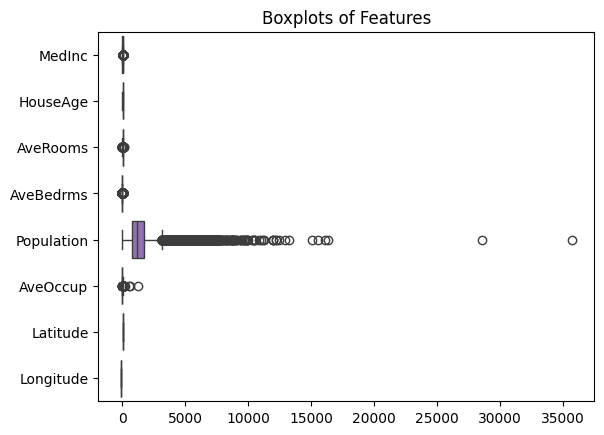

In [12]:
sns.boxplot(data=data, orient="h")
plt.title("Boxplots of Features")
plt.show()

In [13]:
from sklearn.preprocessing import RobustScaler
import pandas as pd

# RobustScaler automatically scales data based on IQR
scaler = RobustScaler()
scaled_values = scaler.fit_transform(data)

# Convert back to a DataFrame
filtered_df = pd.DataFrame(scaled_values, columns=data.columns)

filtered_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.197582,0.631579,1.088935,-0.267221,-0.899787,-0.307981,0.957672,-0.986807
1,2.186664,-0.421053,0.626066,-0.822926,1.316631,-0.830800,0.952381,-0.984169
2,1.707732,1.210526,1.898042,0.263955,-0.714286,-0.018599,0.949735,-0.989446
3,0.967177,1.210526,0.364978,0.259814,-0.648188,-0.316908,0.949735,-0.992084
4,0.142854,1.210526,0.653191,0.345657,-0.640725,-0.746784,0.949735,-0.992084
...,...,...,...,...,...,...,...,...
20635,-0.905796,-0.210526,-0.113966,0.904821,-0.342217,-0.302057,1.380952,-0.686016
20636,-0.448655,-0.578947,0.549064,2.857330,-0.863539,0.357401,1.383598,-0.717678
20637,-0.841709,-0.631579,-0.014635,0.763126,-0.169510,-0.577676,1.367725,-0.720317
20638,-0.765007,-0.578947,0.062286,1.317744,-0.453092,-0.815121,1.367725,-0.746702


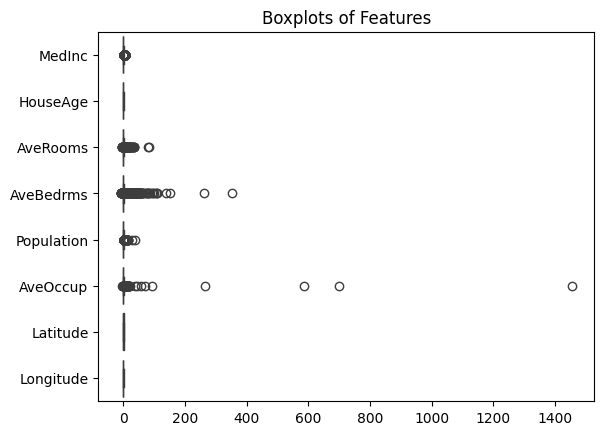

In [14]:
sns.boxplot(data=filtered_df, orient="h")
plt.title("Boxplots of Features")
plt.show()